# Week 5 in class

#### Learning goals
- Increasing your comfort with indexing and slicing
- Introducing you to reshaping

In [1]:
import pandas as pd

### Reading csv-files

**Exercise 1**

The csv-file `wdi_data.csv` contains some data on GDP components collected from the World Bank’s World Development Indicators Dataset.

Create a dataframe `df` using `wdi_data.csv`, and investigate what these data look like.

*Hint:* Make sure that the csv-file is in the same folder as this notebook, or specify a path. 

In [3]:
# YOUR CODE HERE
#raise NotImplemenedError()
#df1 = pd.read_csv("C:/Users/jakob/OneDrive/Dokumendid/Bachelor - Year2/Prog in Python/lecture 5/wdi_data.csv", index_col = 'year')
df = pd.read_csv("wdi_data.csv")
df.head()

,country,year,GovExpend,Consumption,Exports,Imports,GDP
0,Canada,2017,0.372665,1.095475,0.582831,0.600031,1.868164
1,Canada,2016,0.364899,1.058426,0.576394,0.575775,1.814016
2,Canada,2015,0.358303,1.035208,0.568859,0.575793,1.794270
3,Canada,2014,0.353485,1.011988,0.550323,0.572344,1.782252
4,Canada,2013,0.351541,0.986400,0.518040,0.558636,1.732714


### Creating variables

You can see that you have some components of GDP for some countries over some years. However, the component `Investment` is missing from the data. As a seasoned economist, you would remember the expenditure formula for GDP is written

$$GDP=Consumption+Investment+GovExpend+NetExports$$

which we can rearrange to compute investment as a function of the variables in our DataFrame…

$$Investment=GDP−Consumption−GovExpend−NetExports$$

You should remember that you can create a new variable `NetExports` as follows:

`df["NetExports"] = df["Exports"] - df["Imports"]`

However, sometimes it is easier to create a new variable using the `eval` method, which evaluates arithmetic operations written as a string, as below:

In [5]:
df["NetExports"] = df.eval("Exports - Imports")

In [6]:
df.head()

,country,year,GovExpend,Consumption,Exports,Imports,GDP,NetExports
0,Canada,2017,0.372665,1.095475,0.582831,0.600031,1.868164,-0.017201
1,Canada,2016,0.364899,1.058426,0.576394,0.575775,1.814016,0.000619
2,Canada,2015,0.358303,1.035208,0.568859,0.575793,1.794270,-0.006934
3,Canada,2014,0.353485,1.011988,0.550323,0.572344,1.782252,-0.022021
4,Canada,2013,0.351541,0.986400,0.518040,0.558636,1.732714,-0.040596


**Exercise 2**

Create a variable `Investment` using the `eval` method (and the formula above).

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
df["Investment"] = df.eval("GDP - Consumption - GovExpend - NetExports")
df.head()

,country,year,GovExpend,Consumption,Exports,Imports,GDP,NetExports,Investment
0,Canada,2017,0.372665,1.095475,0.582831,0.600031,1.868164,-0.017201,0.417226
1,Canada,2016,0.364899,1.058426,0.576394,0.575775,1.814016,0.000619,0.390072
2,Canada,2015,0.358303,1.035208,0.568859,0.575793,1.794270,-0.006934,0.407692
3,Canada,2014,0.353485,1.011988,0.550323,0.572344,1.782252,-0.022021,0.438800
4,Canada,2013,0.351541,0.986400,0.518040,0.558636,1.732714,-0.040596,0.435369


### Multi-level indexing

**Exercise 3**

Use `df` to create a DataFrame `wdi` with a hierarchical index with `country` as the outer level and `year` as the inner level. Print the first 20 rows of this DataFrame.

In [8]:
# YOUR CODE HERE
#raise NotImplementedError()
wdi = df.set_index(['country', 'year'])
wdi.head(20)

GovExpend  Consumption   Exports   Imports       GDP  \
country year                                                         
Canada  2017   0.372665     1.095475  0.582831  0.600031  1.868164   
        2016   0.364899     1.058426  0.576394  0.575775  1.814016   
        2015   0.358303     1.035208  0.568859  0.575793  1.794270   
        2014   0.353485     1.011988  0.550323  0.572344  1.782252   
        2013   0.351541     0.986400  0.518040  0.558636  1.732714   
        2012   0.354342     0.961226  0.505969  0.547756  1.693428   
        2011   0.351887     0.943145  0.492349  0.528227  1.664240   
        2010   0.347332     0.921952  0.469949  0.500341  1.613543   
        2009   0.339686     0.890078  0.440692  0.439796  1.565291   
        2008   0.330766     0.889602  0.506350  0.502281  1.612862   
        2007   0.318777     0.864012  0.530453  0.498002  1.596876   
        2006   0.311382     0.827643  0.524461  0.470931  1.564608   
        2005   0.303043     0.794390  0.519950  0.447222  1.524608   
        2004   0.299854     0.764357  0.508657  0.416754  1.477317   
        2003   0.294335     0.741796  0.481993  0.384199  1.433089   
        2002   0.286094     0.721974  0.490465  0.368615  1.407725   
        2001   0.279767     0.694230  0.484696  0.362023  1.366590   
        2000   0.270553     0.677713  0.499526  0.380823  1.342805   
Germany 2017   0.745579     2.112009  1.930563  1.666348  3.883870   
        2016   0.734014     2.075615  1.844949  1.589495  3.801859   

              NetExports  Investment  
country year                          
Canada  2017   -0.017201    0.417226  
        2016    0.000619    0.390072  
        2015   -0.006934    0.407692  
        2014   -0.022021    0.438800  
        2013   -0.040596    0.435369  
        2012   -0.041787    0.419647  
        2011   -0.035878    0.405086  
        2010   -0.030393    0.374652  
        2009    0.000896    0.334631  
        2008    0.004068    0.388425  
        2007    0.032451    0.381636  
        2006    0.053530    0.372053  
        2005    0.072729    0.354447  
        2004    0.091902    0.321203  
        2003    0.097794    0.299164  
        2002    0.121850    0.277806  
        2001    0.122673    0.269921  
        2000    0.118702    0.275837  
Germany 2017    0.264214    0.762067  
        2016    0.255455    0.736776

**Exercise 4**

You can see that the years appear in descending order. Apply a method such that the years appear in ascending order.

In [9]:
# YOUR CODE HERE
#raise NotImplementedError()
wdi = wdi.sort_index(ascending = True)
wdi.head()

GovExpend  Consumption   Exports   Imports       GDP  \
country year                                                         
Canada  2000   0.270553     0.677713  0.499526  0.380823  1.342805   
        2001   0.279767     0.694230  0.484696  0.362023  1.366590   
        2002   0.286094     0.721974  0.490465  0.368615  1.407725   
        2003   0.294335     0.741796  0.481993  0.384199  1.433089   
        2004   0.299854     0.764357  0.508657  0.416754  1.477317   

              NetExports  Investment  
country year                          
Canada  2000    0.118702    0.275837  
        2001    0.122673    0.269921  
        2002    0.121850    0.277806  
        2003    0.097794    0.299164  
        2004    0.091902    0.321203

**Exercise 5**

1. Print all rows where the *outer-most* index value is equal to `"United States"` and the second level is equal to `2010`  
1. Print all rows where the *outer-most* index is either `"United States"` or `"Canada"`, and only columns `GDP` and `Consumption` 
1. Print all rows where the the two hierarchical indices are either `("United States", 2010)` or `("Canada", 2011)`, and only column named `GDP`

In [106]:
# YOUR CODE HERE
#raise NotImplementedError()

wdi.loc[("United States", 2010)]



GDP  Consumption
country       year                        
United States 2000  12.620268     8.272097
              2001  12.746262     8.480461
              2002  12.968263     8.698306
              2003  13.339312     8.974708
              2004  13.846058     9.311431
              2005  14.332500     9.643098
              2006  14.741688     9.938503
              2007  15.018268    10.159387
              2008  14.997756    10.137847
              2009  14.617299    10.010687
              2010  14.992053    10.185836
              2011  15.224555    10.378060
              2012  15.567038    10.534042
              2013  15.853796    10.687214
              2014  16.242526    11.000619
              2015  16.710459    11.409800
              2016  16.972348    11.722133
              2017  17.348627    12.019266
Canada        2000   1.342805     0.677713
              2001   1.366590     0.694230
              2002   1.407725     0.721974
              2003   1.433089     0.741796
              2004   1.477317     0.764357
              2005   1.524608     0.794390
              2006   1.564608     0.827643
              2007   1.596876     0.864012
              2008   1.612862     0.889602
              2009   1.565291     0.890078
              2010   1.613543     0.921952
              2011   1.664240     0.943145
              2012   1.693428     0.961226
              2013   1.732714     0.986400
              2014   1.782252     1.011988
              2015   1.794270     1.035208
              2016   1.814016     1.058426
              2017   1.868164     1.095475

In [10]:
wdi.loc[["United States" , "Canada"],( "GDP" , "Consumption")] #also [] work around gdp, consumption

GDP  Consumption
country       year                        
United States 2000  12.620268     8.272097
              2001  12.746262     8.480461
              2002  12.968263     8.698306
              2003  13.339312     8.974708
              2004  13.846058     9.311431
              2005  14.332500     9.643098
              2006  14.741688     9.938503
              2007  15.018268    10.159387
              2008  14.997756    10.137847
              2009  14.617299    10.010687
              2010  14.992053    10.185836
              2011  15.224555    10.378060
              2012  15.567038    10.534042
              2013  15.853796    10.687214
              2014  16.242526    11.000619
              2015  16.710459    11.409800
              2016  16.972348    11.722133
              2017  17.348627    12.019266
Canada        2000   1.342805     0.677713
              2001   1.366590     0.694230
              2002   1.407725     0.721974
              2003   1.433089     0.741796
              2004   1.477317     0.764357
              2005   1.524608     0.794390
              2006   1.564608     0.827643
              2007   1.596876     0.864012
              2008   1.612862     0.889602
              2009   1.565291     0.890078
              2010   1.613543     0.921952
              2011   1.664240     0.943145
              2012   1.693428     0.961226
              2013   1.732714     0.986400
              2014   1.782252     1.011988
              2015   1.794270     1.035208
              2016   1.814016     1.058426
              2017   1.868164     1.095475

In [11]:
wdi.loc[[("United States", 2010), ("Canada", 2011)], "GDP"]

country        year
United States  2010    14.992053
Canada         2011     1.664240
Name: GDP, dtype: float64

However, suppose we wanted to extract the data for all countries, but only the years 2005, 2007, and 2009.

We cannot do this using `wdi.loc` because the year is on the second level, not outer-most level of our index.

To get around this limitation, we can use the `pd.IndexSlice` helper. Here’s an example.

In [17]:
wdi.loc[pd.IndexSlice[:, [2005, 2007, 2009]], :]

GovExpend  Consumption   Exports   Imports        GDP  \
country        year                                                          
Canada         2005   0.303043     0.794390  0.519950  0.447222   1.524608   
               2007   0.318777     0.864012  0.530453  0.498002   1.596876   
               2009   0.339686     0.890078  0.440692  0.439796   1.565291   
Germany        2005   0.591184     1.866253  1.175200  1.028094   3.213777   
               2007   0.605624     1.894219  1.442436  1.213835   3.441356   
               2009   0.645023     1.908393  1.260525  1.121914   3.283144   
United Kingdom 2005   0.490806     1.578914  0.640088  0.715951   2.403352   
               2007   0.504549     1.644789  0.710200  0.767699   2.527327   
               2009   0.519716     1.587152  0.653830  0.689011   2.411632   
United States  2005   2.287022     9.643098  1.431205  2.246246  14.332500   
               2007   2.351987    10.159387  1.701096  2.455016  15.018268   
               2009   2.507390    10.010687  1.646432  2.086299  14.617299   

                     NetExports  Investment  
country        year                          
Canada         2005    0.072729    0.354447  
               2007    0.032451    0.381636  
               2009    0.000896    0.334631  
Germany        2005    0.147106    0.609235  
               2007    0.228601    0.712912  
               2009    0.138611    0.591117  
United Kingdom 2005   -0.075863    0.409494  
               2007   -0.057500    0.435488  
               2009   -0.035182    0.339945  
United States  2005   -0.815041    3.217421  
               2007   -0.753919    3.260813  
               2009   -0.439867    2.539089

**Exercise 6**

Return government expenditure in 2008 for all countries.

In [20]:
# YOUR CODE HERE
#raise NotImplementedError()
wdi1 = wdi.loc[pd.IndexSlice[:, 2008, :], "GovExpend"]
#wdi1["GovExpend"]
print(wdi1)

country         year
Canada          2008    0.330766
Germany         2008    0.626140
United Kingdom  2008    0.513870
United States   2008    2.407771
Name: GovExpend, dtype: float64


### Multi-index Columns

We can create a DataFrame `wdiT` in which we switch the variables in rows and the columns (`wdiT` is the *transpose* of `wdi`), using a method that also applies to numpy arrays: `T` (for transpose).

In [21]:
wdiT = wdi.T 
wdiT.head()

country        Canada                                                    \
year             2000      2001      2002      2003      2004      2005   
GovExpend    0.270553  0.279767  0.286094  0.294335  0.299854  0.303043   
Consumption  0.677713  0.694230  0.721974  0.741796  0.764357  0.794390   
Exports      0.499526  0.484696  0.490465  0.481993  0.508657  0.519950   
Imports      0.380823  0.362023  0.368615  0.384199  0.416754  0.447222   
GDP          1.342805  1.366590  1.407725  1.433089  1.477317  1.524608   

country                                              ... United States  \
year             2006      2007      2008      2009  ...          2008   
GovExpend    0.311382  0.318777  0.330766  0.339686  ...      2.407771   
Consumption  0.827643  0.864012  0.889602  0.890078  ...     10.137847   
Exports      0.524461  0.530453  0.506350  0.440692  ...      1.797347   
Imports      0.470931  0.498002  0.502281  0.439796  ...      2.400349   
GDP          1.564608  1.596876  1.612862  1.565291  ...     14.997756   

country                                                                        \
year              2009       2010       2011       2012       2013       2014   
GovExpend     2.507390   2.510143   2.434378   2.398873   2.353381   2.334071   
Consumption  10.010687  10.185836  10.378060  10.534042  10.687214  11.000619   
Exports       1.646432   1.846280   1.978083   2.045509   2.118639   2.209555   
Imports       2.086299   2.360183   2.493194   2.560677   2.600198   2.732228   
GDP          14.617299  14.992053  15.224555  15.567038  15.853796  16.242526   

country                                       
year              2015       2016       2017  
GovExpend     2.373130   2.407981   2.405743  
Consumption  11.409800  11.722133  12.019266  
Exports       2.222228   2.219937   2.287071  
Imports       2.881337   2.936004   3.069954  
GDP          16.710459  16.972348  17.348627  

[5 rows x 72 columns]

**Exercise 7**

Notice that `wdiT` seems to have two levels of names for the columns. Fortunately, the same logic behind slicing rules applies when we have a hierarchical index for column names.

Create a DataFrame `wdiT_USCan` with all variables in both 2010 and 2011 for both Canada and the United States.

In [22]:
# YOUR CODE HERE
#raise NotImplementedError()


wdiT_USCan = wdiT.loc[:,(["United States", "Canada"], [2010,2011])]
wdiT_USCan.head()


country     United States               Canada          
year                 2010       2011      2010      2011
GovExpend        2.510143   2.434378  0.347332  0.351887
Consumption     10.185836  10.378060  0.921952  0.943145
Exports          1.846280   1.978083  0.469949  0.492349
Imports          2.360183   2.493194  0.500341  0.528227
GDP             14.992053  15.224555  1.613543  1.664240

**Exercise 8**

Create a new DataFrame `wdiT_small` without the rows `Exports`, `Imports` and `GDP`, and print it.

In [29]:
# YOUR CODE HERE
#raise NotImplementedError()
wdiT_small = wdiT.loc[["GovExpend", "Consumption"]]

wdiT_small.head()

country        Canada                                                    \
year             2000      2001      2002      2003      2004      2005   
GovExpend    0.270553  0.279767  0.286094  0.294335  0.299854  0.303043   
Consumption  0.677713  0.694230  0.721974  0.741796  0.764357  0.794390   

country                                              ... United States  \
year             2006      2007      2008      2009  ...          2008   
GovExpend    0.311382  0.318777  0.330766  0.339686  ...      2.407771   
Consumption  0.827643  0.864012  0.889602  0.890078  ...     10.137847   

country                                                                        \
year              2009       2010       2011       2012       2013       2014   
GovExpend     2.507390   2.510143   2.434378   2.398873   2.353381   2.334071   
Consumption  10.010687  10.185836  10.378060  10.534042  10.687214  11.000619   

country                                      
year             2015       2016       2017  
GovExpend     2.37313   2.407981   2.405743  
Consumption  11.40980  11.722133  12.019266  

[2 rows x 72 columns]

### Reshaping your data

`wdiT_small` may not be in a “shape” that makes it easy to analyze. What do we mean by shape? The number of rows and columns in a DataFrame and how information is stored in the index and column names.

A dataset is messy or tidy depending on how rows, columns and tables are
matched with observations, variables, and types. In tidy data:
1.  Each variable forms a column.
2.  Each observation forms a row.
3.  Each type of observational unit forms a table.

Now it becomes essential to think through what uniquely identifies an “observation” in your data. Is it a country? A year? A combination of country and year? The answer will depend on your research question.

We will first reshape the DataFrame using the transpose again, but it is also useful to learn more about methods by which you can customize your data to answer specific questions. 

--------

**Exercise 9**

Create a DataFrame `wdi_small` that is the transpose of `wdiT_small`, and show what it looks like.

In [96]:
# YOUR CODE HERE
#raise NotImplementedError()
wdi_small = wdiT_small.T
wdi_small.head()

GovExpend  Consumption
country year                        
Canada  2000   0.270553     0.677713
        2001   0.279767     0.694230
        2002   0.286094     0.721974
        2003   0.294335     0.741796
        2004   0.299854     0.764357

Currently an observation is uniquely identified by a country and year. Suppose you wish to reshape it so that the observation is a country, and the variables are a GDP component for each year.

You can do this using the `unstack` method. By default, unstack will move the level of the index closest to the data and place it in the column labels closest to the data, as below.

In [39]:
wdi_wide = wdi_small.unstack()
wdi_wide

GovExpend                                                    \
year                2000      2001      2002      2003      2004      2005   
country                                                                      
Canada          0.270553  0.279767  0.286094  0.294335  0.299854  0.303043   
Germany         0.579815  0.582821  0.589812  0.593013  0.588309  0.591184   
United Kingdom  0.401274  0.418387  0.434954  0.452743  0.471828  0.490806   
United States   2.040500  2.112038  2.193188  2.233519  2.267999  2.287022   

                                                        ... Consumption  \
year                2006      2007      2008      2009  ...        2008   
country                                                 ...               
Canada          0.311382  0.318777  0.330766  0.339686  ...    0.889602   
Germany         0.596868  0.605624  0.626140  0.645023  ...    1.905520   
United Kingdom  0.499312  0.504549  0.513870  0.519716  ...    1.635333   
United States   2.314957  2.351987  2.407771  2.507390  ...   10.137847   

                                                                       \
year                 2009       2010       2011       2012       2013   
country                                                                 
Canada           0.890078   0.921952   0.943145   0.961226   0.986400   
Germany          1.908393   1.915481   1.941340   1.967390   1.979458   
United Kingdom   1.587152   1.598563   1.588172   1.612550   1.642336   
United States   10.010687  10.185836  10.378060  10.534042  10.687214   

                                                            
year                 2014       2015       2016       2017  
country                                                     
Canada           1.011988   1.035208   1.058426   1.095475  
Germany          1.999953   2.033666   2.075615   2.112009  
United Kingdom   1.675716   1.718629   1.772348   1.809154  
United States   11.000619  11.409800  11.722133  12.019266  

[4 rows x 36 columns]

A DataFrame like the one above is sometimes called "wide".

By using the `stack` method you can reverse `unstack`. `stack` will move labels down from columns to index, while `unstack` moves them up from index to columns. You can remember stack vs unstack with a mnemonic: **U**nstack moves index levels **U**p

Similar to the `unstack` method, the `stack` method *without any arguments* moves the level of column labels closest to the data (also called inner-most or bottom level of labels) to become the index level closest to the data (also called the inner-most or right-most level of the index).

When we do pass a `level`, that level of column labels is moved down to the right-most level of the index and all other column labels stay in their relative position, as below.

In [141]:
wdi_wide.stack(level="year")

GovExpend  Consumption
country       year                        
Canada        2000   0.270553     0.677713
              2001   0.279767     0.694230
              2002   0.286094     0.721974
              2003   0.294335     0.741796
              2004   0.299854     0.764357
...                       ...          ...
United States 2013   2.353381    10.687214
              2014   2.334071    11.000619
              2015   2.373130    11.409800
              2016   2.407981    11.722133
              2017   2.405743    12.019266

[72 rows x 2 columns]

**Exercise 10** 

Use a combination of `unstack` and `stack` (and not `T`) to turn `wdi_small` into the same DataFrame as `wdiT_small` above.

*Hint:* It is also possible to pass a list of column labels to `level`. 

In [143]:
# YOUR CODE HERE
#raise NotImplementedError()
wdi_small.stack().unstack(level=["country", "year"])

country        Canada                                                    \
year             2000      2001      2002      2003      2004      2005   
GovExpend    0.270553  0.279767  0.286094  0.294335  0.299854  0.303043   
Consumption  0.677713  0.694230  0.721974  0.741796  0.764357  0.794390   

country                                              ... United States  \
year             2006      2007      2008      2009  ...          2008   
GovExpend    0.311382  0.318777  0.330766  0.339686  ...      2.407771   
Consumption  0.827643  0.864012  0.889602  0.890078  ...     10.137847   

country                                                                        \
year              2009       2010       2011       2012       2013       2014   
GovExpend     2.507390   2.510143   2.434378   2.398873   2.353381   2.334071   
Consumption  10.010687  10.185836  10.378060  10.534042  10.687214  11.000619   

country                                      
year             2015       2016       2017  
GovExpend     2.37313   2.407981   2.405743  
Consumption  11.40980  11.722133  12.019266  

[2 rows x 72 columns]

#### `melt`

Above we saw data in "wide" form. The `melt` method is used to create data in long form.

It can be used to move all of the “values” stored in your DataFrame to a single column with all other columns being used to contain identifying information.

Warning: When you use `melt`, any index that you currently have will be deleted. For that reason, we need to reset the index first.

In [90]:
wdi_small = wdi_small.reset_index()
wdi_long = wdi_small.melt(id_vars=["country", "year"])
wdi_long


,country,year,variable,value
0,Canada,2000,GovExpend,0.270553
1,Canada,2001,GovExpend,0.279767
2,Canada,2002,GovExpend,0.286094
3,Canada,2003,GovExpend,0.294335
4,Canada,2004,GovExpend,0.299854
...,...,...,...,...
139,United States,2013,Consumption,10.687214
140,United States,2014,Consumption,11.000619
141,United States,2015,Consumption,11.409800
142,United States,2016,Consumption,11.722133


Notice that the columns we specified as `id_vars` remained columns, but all
other columns were put into two new columns:

1. `variable`: This has dtype string and contains the former column names.
  as values  
1. `value`: This has the former values.  

#### `pivot_table`

Now remember the `pivot_table` method from DataCamp. `pivot_table` handles duplicate index/column pairs using an aggregation. By default, the aggregation is the mean.

However, if you specify index and columns such that there are no duplicates, you can use it to go from `wdi_long` to a DataFrame like `wdi_wide`, as below.

In [20]:
wdi_long.pivot(index="country", columns=["variable", "year"], values="value")

variable      GovExpend           Consumption            NetExports            \
year               2010      2011        2010       2011       2010      2011   
country                                                                         
Canada         0.347332  0.351887    0.921952   0.943145  -0.030393 -0.035878   
United States  2.510143  2.434378   10.185836  10.378060  -0.513903 -0.515111   

variable      Investment            
year                2010      2011  
country                             
Canada          0.374652  0.405086  
United States   2.809977  2.927228

**Exercise 11**

Now use `pivot_table` to go from `wdi_long` to a DataFrame like `wdi_small`.

*Hint:* Like above, you may end up with a `variable` header on the column labels. This is ok.

In [150]:
# YOUR CODE HERE
#raise NotImplementedError()
wdi_long.pivot(index = ["country", "year"], columns = ["variable"], values = "value")

variable            Consumption  GovExpend
country       year                        
Canada        2000     0.677713   0.270553
              2001     0.694230   0.279767
              2002     0.721974   0.286094
              2003     0.741796   0.294335
              2004     0.764357   0.299854
...                         ...        ...
United States 2013    10.687214   2.353381
              2014    11.000619   2.334071
              2015    11.409800   2.373130
              2016    11.722133   2.407981
              2017    12.019266   2.405743

[72 rows x 2 columns]

**Exercise 12**

Replicate `pivot_table` to go from `wdi_long` to a DataFrame like `wdi_wide`, as above.

Instead of `pivot_table`, use some combination of three operations:
1. Call `set_index` with the `index` and `columns` arguments  
1. Extract the `values` column  
1. `unstack` the columns level of the new index  

In [149]:
# YOUR CODE HERE
#raise NotImplementedError()
wdi_long.set_index(["country", "year", "variable"])["value"].unstack(["variable", "year"])

variable       GovExpend                                                    \
year                2000      2001      2002      2003      2004      2005   
country                                                                      
Canada          0.270553  0.279767  0.286094  0.294335  0.299854  0.303043   
Germany         0.579815  0.582821  0.589812  0.593013  0.588309  0.591184   
United Kingdom  0.401274  0.418387  0.434954  0.452743  0.471828  0.490806   
United States   2.040500  2.112038  2.193188  2.233519  2.267999  2.287022   

variable                                                ... Consumption  \
year                2006      2007      2008      2009  ...        2008   
country                                                 ...               
Canada          0.311382  0.318777  0.330766  0.339686  ...    0.889602   
Germany         0.596868  0.605624  0.626140  0.645023  ...    1.905520   
United Kingdom  0.499312  0.504549  0.513870  0.519716  ...    1.635333   
United States   2.314957  2.351987  2.407771  2.507390  ...   10.137847   

variable                                                               \
year                 2009       2010       2011       2012       2013   
country                                                                 
Canada           0.890078   0.921952   0.943145   0.961226   0.986400   
Germany          1.908393   1.915481   1.941340   1.967390   1.979458   
United Kingdom   1.587152   1.598563   1.588172   1.612550   1.642336   
United States   10.010687  10.185836  10.378060  10.534042  10.687214   

variable                                                    
year                 2014       2015       2016       2017  
country                                                     
Canada           1.011988   1.035208   1.058426   1.095475  
Germany          1.999953   2.033666   2.075615   2.112009  
United Kingdom   1.675716   1.718629   1.772348   1.809154  
United States   11.000619  11.409800  11.722133  12.019266  

[4 rows x 36 columns]

### Summary

In some ways `set_index`, `reset_index`, `stack`, and `unstack`
are the “most fundamental” reshaping operations…

The other operations can be formulated with these
four operations (and, in fact, some of them are exactly written as these
operations in `pandas`’s code base).

# Python Homework Week 5

#### Learning goal
Practicing the skills acquired in Datacamp: Data manipulation with Pandas
1. Transforming DataFrames
2. Aggregating DataFrames
3. Slicing and Indexing DataFrames
4. Creating and Visualizing DataFrames

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Introduction

**a) [1 point]**

Below you find a dictionary with the unemployment rate *every other* year for the four regions of the US starting in 1995. Create a Pandas DataFrame `unemp_region` with these data, and print the first few lines of it.

In [3]:
data = {
    "NorthEast": [5.9,  5.6,  4.4,  3.8,  5.8,  4.9,  4.3,  7.1,  8.3,  7.9,  5.7],
    "MidWest": [4.5,  4.3,  3.6,  4. ,  5.7,  5.7,  4.9,  8.1,  8.7,  7.4,  5.1],
    "South": [5.3,  5.2,  4.2,  4. ,  5.7,  5.2,  4.3,  7.6,  9.1,  7.4,  5.5],
    "West": [6.6, 6., 5.2, 4.6, 6.5, 5.5, 4.5, 8.6, 10.7, 8.5, 6.1],
    "National": [5.6, 5.3, 4.3, 4.2, 5.8, 5.3, 4.6, 7.8, 9.1, 8., 5.7]
}
# YOUR CODE HERE
#raise NotImplementedError()
unemp_region = pd.DataFrame(data = data)
print(unemp_region)

    NorthEast  MidWest  South  West  National
0         5.9      4.5    5.3   6.6       5.6
1         5.6      4.3    5.2   6.0       5.3
2         4.4      3.6    4.2   5.2       4.3
3         3.8      4.0    4.0   4.6       4.2
4         5.8      5.7    5.7   6.5       5.8
5         4.9      5.7    5.2   5.5       5.3
6         4.3      4.9    4.3   4.5       4.6
7         7.1      8.1    7.6   8.6       7.8
8         8.3      8.7    9.1  10.7       9.1
9         7.9      7.4    7.4   8.5       8.0
10        5.7      5.1    5.5   6.1       5.7


**b) [1 point]**

Someone claims that the national unemployment rate is not necessarily the same as the average of the four regions. Now we can check whether that is true. 

Create a new variable `UnweightedMean` that is a simple average of the four regional unemployment rates, and print the first few lines.

In [18]:
# YOUR CODE HERE
unemp_region["UnweightedMean"] = (unemp_region["NorthEast"] +
                                 unemp_region["MidWest"] +
                                 unemp_region["South"] + 
                                 unemp_region["West"])/4
#raise NotImplementedError()
#UnweightedMean = np.mean(unemp_region)
#print(UnweightedMean)
print(unemp_region)

    NorthEast  MidWest  South  West  National  UnweightedMean
0         5.9      4.5    5.3   6.6       5.6           5.575
1         5.6      4.3    5.2   6.0       5.3           5.275
2         4.4      3.6    4.2   5.2       4.3           4.350
3         3.8      4.0    4.0   4.6       4.2           4.100
4         5.8      5.7    5.7   6.5       5.8           5.925
5         4.9      5.7    5.2   5.5       5.3           5.325
6         4.3      4.9    4.3   4.5       4.6           4.500
7         7.1      8.1    7.6   8.6       7.8           7.850
8         8.3      8.7    9.1  10.7       9.1           9.200
9         7.9      7.4    7.4   8.5       8.0           7.800
10        5.7      5.1    5.5   6.1       5.7           5.600


We see that the claim is true. The unweighted mean is not equal to national unemployment rate because the four regions are not equal in size. 

**c) [1 point]**

Unless you have done something special at **a)**, `unemp_region` has an index from 0 to 10. Add a new variable `Year` ranging from 1995 to 2015, set it as index, and print the first few lines of the DataFrame. 

*Hint:* To protect your DataFrame, many pandas operations do not automatically overwrite it. There are two solutions that make sure that `Year` actually appears as index:
1. Assign the output back to your DataFrame: `unemp_region = unemp_region.`... 
2. Use `inplace=True` as an argument in your method.

**d) [1 point]**

Use google to find out how to drop a variable. Drop the variable `UnweightedMean` from your DataFrame, and print the first few lines. 

*Hint:* Depending on your method, you may need to reassign the DataFrame just as above.

In [27]:
# YOUR CODE HERE
#raise NotImplementedError()
unemp_region["Year"] = list(range(1995,2017,2))
unemp_region = unemp_region.set_index("Year")


print(unemp_region)

      NorthEast  MidWest  South  West  National
Year                                           
1995        5.9      4.5    5.3   6.6       5.6
1997        5.6      4.3    5.2   6.0       5.3
1999        4.4      3.6    4.2   5.2       4.3
2001        3.8      4.0    4.0   4.6       4.2
2003        5.8      5.7    5.7   6.5       5.8
2005        4.9      5.7    5.2   5.5       5.3
2007        4.3      4.9    4.3   4.5       4.6
2009        7.1      8.1    7.6   8.6       7.8
2011        8.3      8.7    9.1  10.7       9.1
2013        7.9      7.4    7.4   8.5       8.0
2015        5.7      5.1    5.5   6.1       5.7


In [24]:
pd.DataFrame?

In [19]:
# YOUR CODE HERE
#raise NotImplementedError()

print(unemp_region)

KeyError: 'None of [1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015] are in the columns'

**e) [1 point]**

One advantage of an index is that you can more easily extract parts of your DataFrame. Use the `loc` method to extract the national unemployment rate in 2009.

In [21]:
# YOUR CODE HERE
#raise NotImplementedError()
print(unemp_region.loc[ 2009, 'National'])


7.8


**f) [1 point]**

Another advantage of an index is that it becomes the default variable for an x-axis. Similarly, the default for a y-axis variable are all variables. (Obviously, this is only helpful if all variables are somehow comparable.)

Create a line-plot that shows the development of unemployment in all regions (and nationwide) over time.

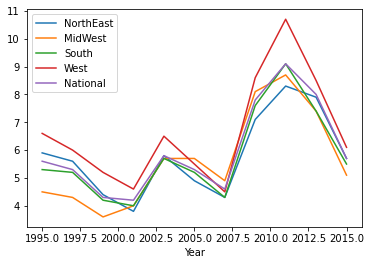

In [28]:
# YOUR CODE HERE
#raise NotImplementedError()
unemp_region.plot()
plt.show()

**g) [1 point]**

The line-plot suggests that on average over all years, unemployment is highest in the West. However, the ranking of unemployment across the other regions is harder to see.

Compute the average unemployment (over all years) for each region and nationwide.

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
unemp_region.mean()

NorthEast         5.790909
MidWest           5.636364
South             5.772727
West              6.618182
National          5.972727
UnweightedMean    5.954545
dtype: float64

**h) [1 point]**

We see that the MidWest has the lowest unemployment rate on average. However, arguably high spikes in unemployment are just as harmful as high average unemployment. 

Compute the 90th percentile of unemployment for each region. Does the MidWest still do so well?

In [9]:
# YOUR CODE HERE
#raise NotImplementedError()
unemp_region.quantile(0.9)

NorthEast         7.90
MidWest           8.10
South             7.60
West              8.60
National          8.00
UnweightedMean    7.85
Name: 0.9, dtype: float64

**i) [1 point]**

Suppose you are particularly interested in the regional unemployment rates in the aftermath of the Great Recession. Select the unemployment rates for all regions in those years in which the national unemployment rate exceeds 7 percent. 

In [31]:
# YOUR CODE HERE
#raise NotImplementedError()
unemp_region[unemp_region["National"]> 7]

,NorthEast,MidWest,South,West,National
Year,,,,,
2009,7.1,8.1,7.6,8.6,7.8
2011,8.3,8.7,9.1,10.7,9.1
2013,7.9,7.4,7.4,8.5,8.0


**j) [1 point]**

Unless you have done something very special above, the line-plot shows the years on the x-axis with decimal points. Clearly that doesn't make sense.

Reset the index while reassigning the DataFrame to keep the variable `Year` (or use `inplace=True`). Then inspect the types of data using the code `unemp_region.dtypes`. 

In [32]:
unemp_region.dtypes
# YOUR CODE HERE
#raise NotImplementedError()

NorthEast    float64
MidWest      float64
South        float64
West         float64
National     float64
dtype: object

As you can see, the problem is not that `Year` is not an integer. You can solve the problem by turning `Year` into a `datetime` object, as below. We wil learn more about `datetime` objects next week.

In [29]:
unemp_region['Year'] = pd.to_datetime(unemp_region['Year'], format='%Y')
unemp_region.plot(x="Year")
plt.show()

KeyError: 'Year'